In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Customer Churn.csv')


In [4]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

## PCA

In [7]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [8]:
exp_var = pca.explained_variance_ratio_

<BarContainer object of 15 artists>

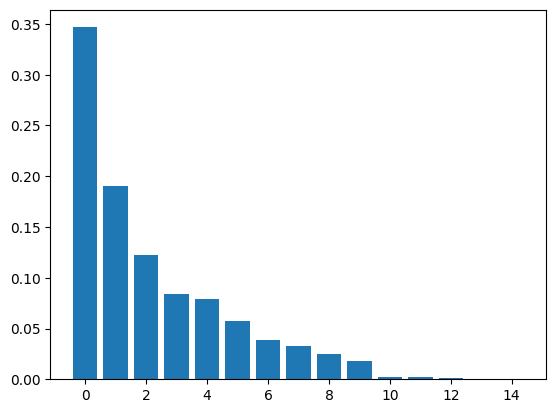

In [9]:
plt.bar(range(len(exp_var)), exp_var)

In [10]:
pca.explained_variance_ratio_.cumsum()

array([0.34675269, 0.53703364, 0.65942901, 0.74359987, 0.82299251,
       0.8805293 , 0.91901357, 0.95193385, 0.9767207 , 0.99435202,
       0.99678972, 0.99899538, 0.99993069, 1.        , 1.        ])

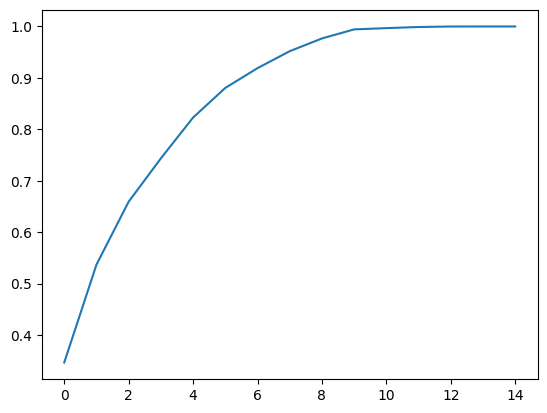

In [11]:
plt.plot(pca.explained_variance_ratio_.cumsum() )

In [12]:
pca = PCA(n_components=5, random_state=42)

In [13]:
X_pca = pca.fit_transform(X_scaled)

In [14]:
X_pca.shape

(3150, 5)

In [15]:
components = pca.components_.T

In [16]:
loadings = pd.DataFrame(components, columns=[1,2,3,4,5], index=X.columns)
print(loadings)

                                1         2         3         4         5
Call  Failure            0.182343  0.351719 -0.188421  0.268448  0.231882
Complains               -0.075994  0.043715 -0.085956  0.430518  0.525071
Subscription  Length     0.055517  0.039106  0.013196  0.659078 -0.319458
Charge  Amount           0.193759  0.346852  0.094712 -0.034399  0.291052
Seconds of Use           0.314065  0.293219 -0.153415  0.002409 -0.207589
Frequency of use         0.316517  0.292543 -0.212750 -0.002730 -0.167254
Frequency of SMS         0.311665 -0.313026  0.299823  0.090130  0.100155
Distinct Called Numbers  0.263373  0.308037 -0.160813 -0.019909 -0.112941
Age Group               -0.061076  0.315283  0.598703  0.027153  0.010484
Tariff Plan              0.156255  0.006179 -0.110954 -0.261404  0.602260
Status                  -0.260408 -0.084716 -0.040242  0.458833  0.159776
Age                     -0.068964  0.331060  0.580499 -0.011920  0.014260
Customer Value           0.390705 -0.2

<Axes: >

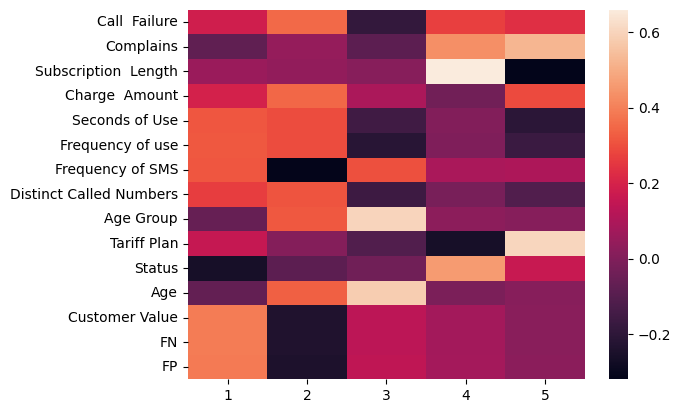

In [17]:
sns.heatmap(loadings)

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

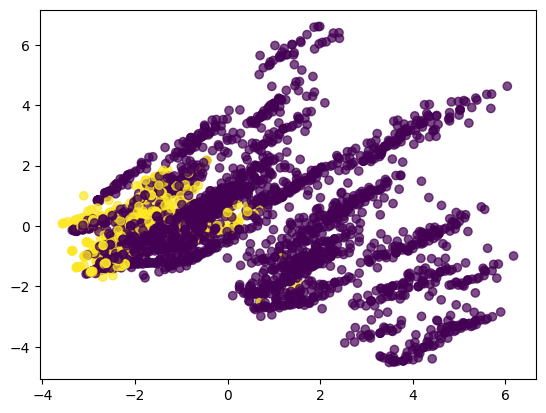

In [19]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, alpha=0.7)

## t-SNE

#### Checking perplexity vs. divergence

In [20]:
perplexity = np.arange(5,55,10)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_scaled)
    divergence.append(model.kl_divergence_)

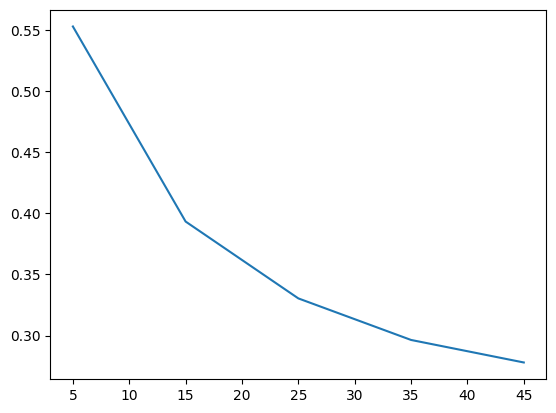

In [21]:
plt.plot(perplexity,divergence)

In [23]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

tsne.kl_divergence_

0.28643524646759033

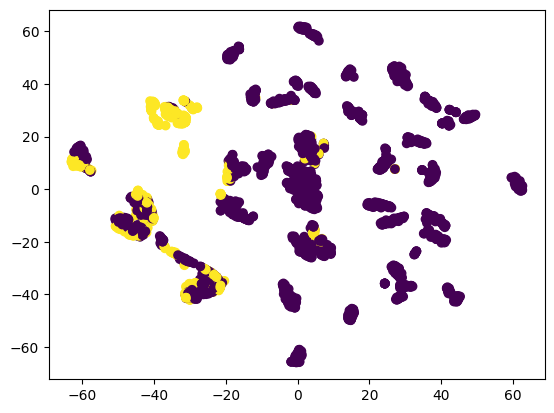

In [25]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)

## SVD

In [26]:
svd = TruncatedSVD()